In [13]:
import pandas as pd
import numpy as np

In [14]:
data = pd.read_csv('cleaned_data.csv')

In [15]:
x_feature = data.drop(['log_Global_Sales'], axis=1)
y_feature = data['log_Global_Sales']

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_feature, y_feature, test_size=0.25, random_state=0)

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve

In [18]:
# Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [19]:
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [20]:
lr_predictions = lr.predict(x_test)

In [21]:
# evaluation
from sklearn.metrics import explained_variance_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


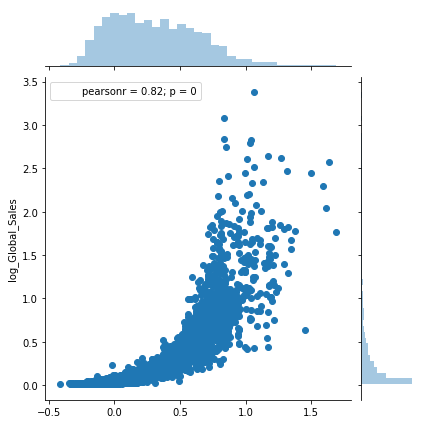

In [22]:
sns.jointplot(lr_predictions, y_test)

In [23]:
MAE_lr = mean_absolute_error(y_test, lr_predictions)
MSE_lr = mean_squared_error(y_test, lr_predictions)
VAR_lr = explained_variance_score(y_test, lr_predictions)

In [24]:
print("Mean Absolute Error = " + str(MAE_lr))
print("Mean Square Error = " + str(MSE_lr))
print("Explained variance Score = " + str(VAR_lr))

Mean Absolute Error = 0.14503886817000924
Mean Square Error = 0.04983219803904673
Explained variance Score = 0.6776779191537474


In [25]:
# Ridge regression
from sklearn.linear_model import Ridge

In [26]:
ridge = Ridge()
parameters = {'alpha':[0.001,0.005,0.01,0.1,0.5,1], 'normalize':[True,False], 'tol':[1e-06,5e-06,1e-05,5e-05]}
grid_ridge = GridSearchCV(ridge, parameters, cv=10, verbose=1, scoring = 'explained_variance')
grid_ridge.fit(x_train, y_train)

print(grid_ridge.best_score_)
print(grid_ridge.best_params_)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:  3.5min finished


0.6769121660667736
{'alpha': 1, 'normalize': False, 'tol': 1e-06}


In [27]:
ridge_optimized = Ridge(alpha= 1, normalize= False, tol=1e-06)

In [28]:
ridge_optimized.fit(x_train,y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=1e-06)

In [29]:
ridge_predict = ridge_optimized.predict(x_test)

In [30]:
MAE_ridge = mean_absolute_error(y_test, ridge_predict)
MSE_ridge = mean_squared_error(y_test, ridge_predict)
VAR_ridge = explained_variance_score(y_test, ridge_predict)

In [31]:
print("Mean Absolute Error = " + str(MAE_ridge))
print("Mean Square Error = " + str(MSE_ridge))
print("Explained Variance Score = " + str(VAR_ridge))

Mean Absolute Error = 0.14348227290747526
Mean Square Error = 0.04926600435231353
Explained Variance Score = 0.6813848802840485


In [32]:
# Random Foreset
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [33]:
rf.fit(x_train, y_train)

D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [34]:
rf_predict = rf.predict(x_test)

In [35]:
MAE_rf = mean_absolute_error(y_test, rf_predict)
MSE_rf = mean_squared_error(y_test, rf_predict)
VAR_rf = explained_variance_score(y_test, rf_predict)

In [36]:
print("Mean Absolute Error = " + str(MAE_rf))
print("Mean Square Error = " + str(MSE_rf))
print("Explained Variance Score = " + str(VAR_rf))

Mean Absolute Error = 0.0002636183301926749
Mean Square Error = 4.335157940824361e-06
Explained Variance Score = 0.9999720145645977


In [37]:
# Random Hyperparameter Grid
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [38]:
# Random grid search
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 2, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


KeyboardInterrupt: 

In [ ]:
'''
print(rf_random.best_score_)
print(rf_random.best_params_)
'''

In [39]:
rf_optimized = RandomForestRegressor(n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features='sqrt',max_depth=30,bootstrap=False)

In [40]:
rf_optimized.fit(x_train,y_train)

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=30,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=800, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [42]:
rf_predict = rf_optimized.predict(x_test)

In [43]:
MAE_rf = mean_absolute_error(y_test, rf_predict)
MSE_rf = mean_squared_error(y_test, rf_predict)
VAR_rf = explained_variance_score(y_test, rf_predict)

In [44]:
print("Mean Absolute Error = " + str(MAE_rf))
print("Mean Square Error = " + str(MSE_rf))
print("Explained Variance Score = " + str(VAR_rf))

Mean Absolute Error = 0.11439598858097254
Mean Square Error = 0.035195664699839195
Explained Variance Score = 0.7723470982731742


In [45]:
# Neural network(tensorflow)
import tensorflow as tf
from tensorflow import keras

D:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [47]:
def build_model():
    model = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu,
                       input_shape=(x_train.shape[1],)),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(1)])
    optimizer = tf.train.RMSPropOptimizer(0.001)
    model.compile(loss='mse', optimizer=optimizer, metrics=['mae'])
    return model

model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                40640     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 44,865
Trainable params: 44,865
Non-trainable params: 0
_________________________________________________________________


In [49]:
test_predictions = model.predict(x_test).flatten()

# plt.scatter(y_test, test_predictions)
# plt.xlabel('True Value')
# plt.ylabel('Prediction')
# plt.axis('equal')
# plt.xlim(plt.xlim())
# plt.ylim(plt.ylim())
# _ = plt.plot([-100, 100], [-100, 100])

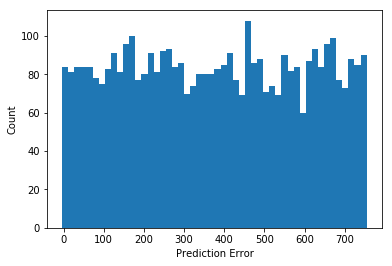

In [50]:
error = test_predictions - y_test
plt.hist(error, bins = 50)
plt.xlabel("Prediction Error")
_ = plt.ylabel("Count")

In [51]:
MAE_NN = mean_absolute_error(y_test, test_predictions)
MSE_NN = mean_squared_error(y_test, test_predictions)
VAR_NN = explained_variance_score(y_test, test_predictions)

In [52]:
print("Mean Absolute Error = " + str(MAE_NN))
print("Mean Square Error = " + str(MSE_NN))
print("Explained variance :" + str(VAR_NN))

Mean Absolute Error = 375.7465542278361
Mean Square Error = 189358.10431395427
Explained variance :-311631.7718404571


In [53]:
# xgboost
import xgboost

XGBoostError: XGBoost Library (xgboost.dll) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed (vcomp140.dll or libgomp-1.dll for Windows, libgomp.so for UNIX-like OSes)
  * You are running 32-bit Python on a 64-bit OS
Error message(s): ['[WinError 127] The specified procedure could not be found']
